

# Hypothsis: 

women tend to work harder than men in university (field of science) in order to have a place in the men dominated field.


## The first aspect:

After university, women tend to work better than men.

We load a file of dataset  about the acedamic performance of students in university.

All the programme of study:

BCH - Biochemistry

BLD - Building technology

CEN - Computer Engineering

CHE - Chemical Engineering

CHM - Industrial Chemistry

CIS - Computer Science

CVE - Civil Engineering

EEE - Electrical and Electronics Engineering

ICE - Information and Communication Engineering

MAT - Mathematics

MCB - Microbiology

MCE - Mechanical Engineering

MIS - Management and Information System

PET - Petroleum Engineering

PHYE - Industrial Physics-Electronics and IT Applications

PHYG - Industrial Physics-Applied Geophysics

PHYR - Industrial Physics-Renewable Energy

In [51]:
import pandas as pd

score_data = pd.read_csv("academic_performance_dataset_V2.csv")

score_data.head()

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24


Since there are 17 different kinds of study Program, in order to simplize the analysis, we classify them into the following categories:

Biology: BCH, MCB

Math: MAT

Physics: PHYG, PHYR, PHYE

Chemistry: CHE, CHM, PET

Technology: BLD, MIS

Computer_science: CEN, CIS, ICE

Mechanics: CVE, MCE, BLD

In [52]:
def reclassify_program(old_code):
    if old_code == "BCH" or old_code =="MCB":
        return "biology"
    if old_code == "MAT":
        return "math"
    if old_code == "PHYG" or old_code =="PHYR" or old_code =="PHYE":
        return "physcis"
    if old_code == "CHE" or old_code == "CHM" or old_code =="PET":
        return "chemistry"
    if old_code == "BLD" or old_code == "MIS":
        return "tech"
    if old_code == "CEN" or old_code =="CIS" or old_code =="ICE":
        return "computer_science"
    if old_code == "CVE" or old_code =="MCE" or old_code =="BLD":
        return "mechanics"

score_data["Program"] = score_data["Prog Code"].apply(reclassify_program)    

score_data.head()

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA,Program
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13,computer_science
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02,biology
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19,biology
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19,biology
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24,biology


Let's count the number of males and females in general.

In [53]:
score_data.groupby("Gender")["Gender"].count()

Gender
Female    1093
Male      1953
Name: Gender, dtype: int64

Let's count the number of students in every program.

In [54]:
score_data.groupby("Program")["Program"].count()


Program
biology             312
chemistry           531
computer_science    824
math                 61
mechanics           351
physcis             145
tech                404
Name: Program, dtype: int64

Let's count the number of students enrolled in school each year.

In [55]:
score_data.groupby("YoG")["YoG"].count()

YoG
2010    470
2011    471
2012    714
2013    811
2014    580
Name: YoG, dtype: int64

To have an overall view, we compare the GPA (At the end of university study) of females and males.

In [56]:
score_data.groupby("Gender")["SGPA"].mean()

Gender
Female    3.139222
Male      3.108689
Name: SGPA, dtype: float64

We find that females do slightly better than males in general.

Now let's see what happens in each year.

In [57]:
score_data.groupby(["YoG","Gender"])["SGPA"].mean()

YoG   Gender
2010  Female    3.298980
      Male      3.246440
2011  Female    3.132488
      Male      3.032970
2012  Female    3.179423
      Male      3.148040
2013  Female    3.076324
      Male      3.058071
2014  Female    3.065311
      Male      3.068437
Name: SGPA, dtype: float64

In [67]:
average_score_every_year = score_data.groupby(["YoG","Gender"])["SGPA"].mean().reset_index()
average_female_score_every_year=average_score_every_year[average_score_every_year["Gender"]=="Female"]
average_male_score_every_year=average_score_every_year[average_score_every_year["Gender"]=="Male"]

Let's visulaize it!

Text(0.5, 1.0, 'The average GPA of male and female change with the year enrolled in university')

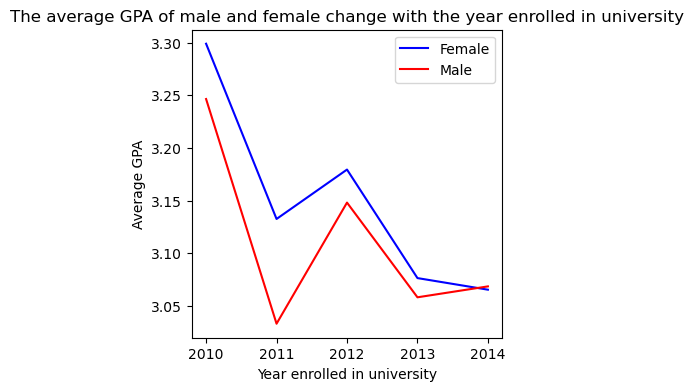

In [81]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(4,4))
plt.plot( average_female_score_every_year["YoG"], average_female_score_every_year["SGPA"],color = "b",label = "Female")
plt.plot(average_male_score_every_year["YoG"], average_male_score_every_year["SGPA"],color = "r",label = "Male")
plt.xlabel("Year enrolled in university")
plt.ylabel("Average GPA")
plt.legend()
plt.title("The average GPA of male and female change with the year enrolled in university")


From the figure, we can see that every year women are slightly better then men or do equally well.

Now let's move to the different study program.

First let's count the number of females and males in every study program.

In [78]:
score_data.groupby(["Program","Gender"])["ID No"].count()

Program           Gender
biology           Female    243
                  Male       69
chemistry         Female    210
                  Male      321
computer_science  Female    287
                  Male      537
math              Female     27
                  Male       34
mechanics         Female     40
                  Male      311
physcis           Female     24
                  Male      121
tech              Female    181
                  Male      223
Name: ID No, dtype: int64

# The second aspect:

Women makes more progress than men in university (compared with high school).